(see https://www.dataquest.io/blog/jupyter-notebook-tutorial/)

## How to read and handle a json file
Here we open a json file containing all the reddit submissions related to stock FIZZ. 

In [1]:
import pandas as pd
filename = 'Z:/Reddit/FIZZ/submissions_wallstreetbets_FIZZ_start20200901_end20210706.json' # insert here your path
df = pd.read_json(filename, orient='index') 
# print the first entry:
print(df.iloc[0])

all_awardings                                                           []
author                                                         FuwaFuwaCow
author_fullname                                                  t2_11bqj6
created                                                         1598968314
created_utc                                                     1598975514
full_link                https://www.reddit.com/r/wallstreetbets/commen...
gildings                                                                {}
id                                                                  ikmso9
link_flair_css_class                                                    dd
link_flair_text                                                         DD
num_comments                                                             2
num_crossposts                                                           0
over_18                                                              False
permalink                

## Select the relevant information
Not all the fields are equally useful for our analysis. Here we select only some of them (this list is not exhaustive).

In [5]:
list_fields = ['author_fullname','created_utc','num_comments','permalink','score','title','upvote_ratio']
df = df[list_fields]
print('The shape of the dataframe is now ', df.shape)
print(df.head())

The shape of the dataframe is now  (176, 7)
       author_fullname         created_utc  num_comments  \
ikmso9       t2_11bqj6 2020-09-01 15:51:54             2   
ikmyh8       t2_11bqj6 2020-09-01 16:00:41            11   
ind4n6     t2_5xkqyi99 2020-09-06 01:18:16            10   
iycabf     t2_32qhmlkl 2020-09-23 15:28:11             8   
k0o1ax        t2_7suwa 2020-11-25 08:04:50             0   

                                                permalink  score  \
ikmso9  /r/wallstreetbets/comments/ikmso9/lacroix_make...      1   
ikmyh8  /r/wallstreetbets/comments/ikmyh8/lacroix_make...      1   
ind4n6  /r/wallstreetbets/comments/ind4n6/nio_baas_is_...      1   
iycabf  /r/wallstreetbets/comments/iycabf/pop_pop_fizz...      1   
k0o1ax  /r/wallstreetbets/comments/k0o1ax/fizz_a_good_...      1   

                                                    title  upvote_ratio  
ikmso9  LaCroix Maker (FIZZ) in Multi-Year Cup-and-Han...           1.0  
ikmyh8  LaCroix Maker (FIZZ) breaking 

## Convert the times into readable format
In the json files, times are saved as integer values. Here we transform these values into DateTime values.

In [7]:
df['created_utc'] = pd.to_datetime(df['created_utc'], origin='unix', unit='s') 
# created_utc is the time when the submission was created by its author
print(df[['author_fullname','created_utc']].head())

       author_fullname         created_utc
ikmso9       t2_11bqj6 2020-09-01 15:51:54
ikmyh8       t2_11bqj6 2020-09-01 16:00:41
ind4n6     t2_5xkqyi99 2020-09-06 01:18:16
iycabf     t2_32qhmlkl 2020-09-23 15:28:11
k0o1ax        t2_7suwa 2020-11-25 08:04:50


## Make a simple analysis (1)
Here we begin the analysis of the submissions, checking the distribution of the number of comments associated to each post.

The maximum number of comments associated to a submission is 1434
The most commented post about FIZZ is identified by l9sh9e
Its title is " DDDD - Why GME Might 🚀🌝 Next Week, and How It Could Trigger a Financial Crisis "


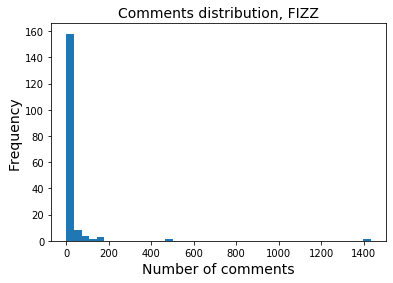

In [19]:
import matplotlib.pyplot as pl
num_bins = 40 # number of bins for the histogram
pl.hist(df['num_comments'].values, bins=num_bins)
pl.xlabel('Number of comments', fontsize=14)
pl.ylabel('Frequency', fontsize=14)
pl.title('Comments distribution, FIZZ', fontsize=14)

print('The maximum number of comments associated to a submission is', df['num_comments'].max())
id_max = df[df['num_comments'] == df['num_comments'].max()].index[0]
print('The most commented post about FIZZ is identified by', id_max)
print('Its title is "', df['title'].loc[id_max], '"')

## Make a simple analysis (2)
We can also sort our dataframe based on some field. For example, here we rank the submissions based on their score and check what the correlation is between number of comments of submission score.

In [24]:
# sort in descending order, from the highest score to the lowest
df_sorted = df.sort_values(['score'], ascending=False) 
print(df_sorted.head())

# compute correlation between two columns of the dataframe:
correlation = df['score'].corr(df['num_comments'])
print('The correlation between score and number of comments is', correlation)

       author_fullname         created_utc  num_comments  \
l9sh9e        t2_t96r7 2021-02-01 02:25:47          1434   
l9suez     t2_3obja9fq 2021-02-01 02:45:25           175   
l8od5u     t2_4dq93axc 2021-01-30 15:49:27           130   
nxmp97     t2_cjkregvr 2021-06-11 18:24:14             4   
l0qvfq       t2_13bnbn 2021-01-19 19:14:34            43   

                                                permalink  score  \
l9sh9e  /r/wallstreetbets/comments/l9sh9e/dddd_why_gme...   4722   
l9suez  /r/wallstreetbets/comments/l9suez/now_imagine_...    332   
l8od5u  /r/wallstreetbets/comments/l8od5u/why_the_whal...     58   
nxmp97  /r/wallstreetbets/comments/nxmp97/i_visited_an...     14   
l0qvfq  /r/wallstreetbets/comments/l0qvfq/fyi_fizz_may...      8   

                                                    title  upvote_ratio  
l9sh9e  DDDD - Why GME Might 🚀🌝 Next Week, and How It ...          0.96  
l9suez  Now imagine Hedge Fund A &amp; B betting on th...          0.94  
l8od5u  